Que.Prepare rules for the all the data sets

Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
Change the minimum length in apriori algorithm
Visulize the obtained rules using different plots

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [10]:
# Import The Data
movies = pd.read_csv(r'C:\Users\Admin\Downloads\my_movies.csv')
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [11]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [18]:
#Check for  shape.
movies.shape

(10, 15)

In [20]:
#Check For Size
movies.size

150

In [23]:
#Check The null values.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [27]:
movies1=movies.iloc[:,5:16]

In [29]:
#Model 1
#Prepare an apriori algorithm
movies_watch = apriori(movies1, min_support=0.1, use_colnames=True)
movies_watch

C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [47]:
# Build an association model use lift metric.
rules1 = association_rules(movies_watch, metric="lift", min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
241,(LOTR2),"(Green Mile, Harry Potter1, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(LOTR1),"(Green Mile, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(Green Mile),"(Harry Potter1, LOTR1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(Sixth Sense),"(Green Mile, Harry Potter1, LOTR1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [52]:
rules1.sort_values('lift',ascending = False,inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
193,"(Green Mile, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
182,"(LOTR1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
133,"(Gladiator, Green Mile, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
102,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
221,"(Green Mile, LOTR1, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
5,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80


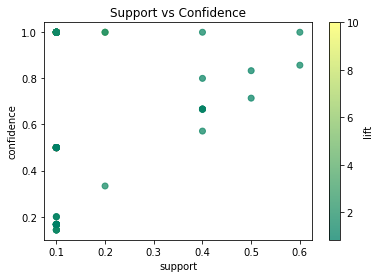

In [58]:
# Plot the Scatter plot for support and confidence for the first association role.
plt.scatter(rules1['support'], rules1['confidence'],c=rules1['lift'],cmap= 'summer',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

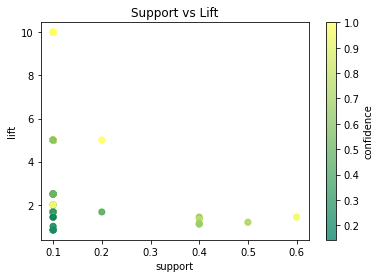

In [70]:
# Plot the Scatter plot for support and lift for the first association role
plt.scatter(rules1["support"], rules1["lift"],c=rules1['confidence'],cmap= 'summer',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

In [79]:
#Model 2
#crate other rules by taking different length in Apriori.
movies_watch1 = apriori(movies1, min_support=0.03, use_colnames=True)
movies_watch1 

C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [83]:
rules2 = association_rules(movies_watch1, metric="lift", min_threshold=1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
233,(LOTR2),"(Green Mile, Harry Potter1, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
234,(LOTR1),"(Green Mile, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
235,(Green Mile),"(Harry Potter1, LOTR1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
236,(Sixth Sense),"(Green Mile, Harry Potter1, LOTR1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [90]:
# Sorting the value
rules2.sort_values('lift',ascending = False,inplace=True)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
202,"(Harry Potter1, LOTR2)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
201,"(Harry Potter1, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
99,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
142,"(Harry Potter1, LOTR1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
171,"(Green Mile, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
37,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
45,"(Gladiator, Sixth Sense)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


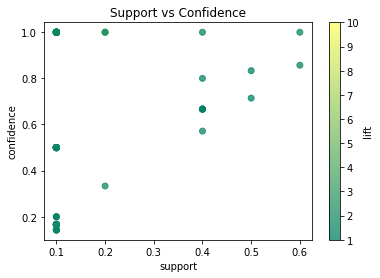

In [102]:
# Plot the Scatter plot Support vs confidence with lift.
plt.scatter(rules2['support'], rules2['confidence'],c=rules2['lift'],cmap= 'summer',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

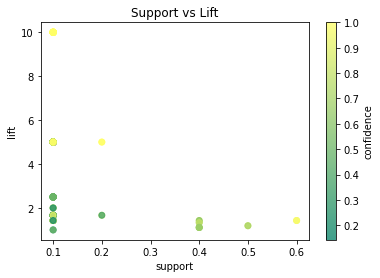

In [117]:
# Scatter plot for support Vs Lift with Confidence.
plt.scatter(rules2["support"], rules2["lift"],c=rules2['confidence'],cmap= 'summer',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

#output:-
Thus from the above association rules, both the rules show that the lift, evaluation metric is highest with the value of 10.we can use the model to predict the most associated movie, by just giving the name of the movie as the input.